# References
## 
* 

# Parameters adjusted

# Considerations
* For now, I am using a Poisson distribution, but Williams and Baker (2009) used gaussians for their inputs.

In [1]:
import sys
sys.path.insert(0, '../../..')
import time
from scipy import signal
from scipy.fftpack import fft

import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

from Configuration import Configuration
from MotorUnitPoolOpt import MotorUnitPool
from InterneuronPoolOpt import InterneuronPool
from NeuralTract import NeuralTract
from SynapsesFactory import SynapsesFactory

In [2]:
def simulator(numberCM, numberS, numberFR, numberFF, numberRC, Parametrization, MNRCdecay, RCMNdecay, posMN, posRC, FFConductanceStrength):

    conf = Configuration('../../confuchiyama.rmto')
    
    # Number of cells
    idx = np.where(conf.confArray['f0']=='Number_CMExt')[0][0]
    conf.confArray['f1'][idx] = numberCM
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = 1000
    
    if Parametrization == 'old':
        from SynapsesFactory import SynapsesFactory
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
        
    elif Parametrization == 'new':
        from SynapsesFactory import SynapsesFactory
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
        
    elif Parametrization == 'final':
        from SynapsesFactoryRenshaw import SynapsesFactory
        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.130
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.119
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.081
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = FFConductanceStrength/2.2
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = FFConductanceStrength/1.8
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = FFConductanceStrength
        
        # Threshold
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 18.9089
        conf.confArray['f2'][idx] = 18.9089

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 27
        conf.confArray['f2'][idx] = 27
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 218.2168
        conf.confArray['f2'][idx] = 218.2168
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 7000
        conf.confArray['f2'][idx] = 7000

        # Ks
        idx = np.where(conf.confArray['f0']=='gmax_Kf:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 3300
        idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 2300000
        idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.02
        idx = np.where(conf.confArray['f0']=='alpha_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.004
        idx = np.where(conf.confArray['f0']=='alpha_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='beta_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.5
        
        ## Connectivity, set to ensure neurons are connected properly
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        
        # Decay factors
        idx = np.where(conf.confArray['f0']=='dec:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        
        # Columnar length
        idx = np.where(conf.confArray['f0']=='position:MG-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posMN
        idx = np.where(conf.confArray['f0']=='position:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posRC
        
    # Dynamics of MN-RC synapse
    idx = np.where(conf.confArray['f0']=='dyn:MG-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    idx = np.where(conf.confArray['f0']=='dyn:MG-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    idx = np.where(conf.confArray['f0']=='dyn:MG-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None

    pools = dict()
    pools[0] = MotorUnitPool(conf, 'MG')
    pools[1] = NeuralTract(conf, 'CMExt')
    pools[2] = InterneuronPool(conf, 'RC', 'ext')

    Syn = SynapsesFactory(conf, pools)

    GammaOrder = 1 # Gamma process of order 1 is equivalent to Poisson process
    FR = 21 
    
    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    RC_mV = np.zeros_like(t)
    MN_mV = np.zeros_like(t)

    for i in xrange(0, len(t)):
        pools[1].atualizePool(t[i],FR, GammaOrder)
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        pools[3].atualizePool(t[i]) # RC synaptic Noise
        pools[2].atualizeInterneuronPool(t[i]) # RC pool
        RC_mV[i] = pools[2].v_mV[0]
        MN_mV[i] = pools[0].v_mV[2*(0)+1]
        
    pools[1].listSpikes()
    pools[0].getMotorUnitPoolEMG()    
    
    fs=1/(conf.timeStep_ms*1e-3)
    window = 512

    plt.figure()
    plt.plot(pools[0].emg)
    plt.show()
    plt.figure()
    plt.plot(pools[1].poolTerminalSpikes[:, 0], pools[1].poolTerminalSpikes[:, 1]+1, '.')
    plt.show()

#     emg = [x[0] for x in pools[0].emg]
#     spikes = pools[1].poolTerminalSpikes[:, 0].tolist()
#     f1, Cxy = signal.coherence(emg, spikes, fs, nperseg=window)
    muscleForce = [x[0] for x in pools[0].Muscle.force]
    f2, Pxx = signal.welch(muscleForce, fs, nperseg=window)
#     import pdb; pdb.set_trace()

#     plt.figure()
#     plt.plot(f1, Cxy)
#     plt.xlabel('f (Hz)')
#     plt.ylabel('Coherence')
#     plt.xlim((0, 500))
    
    plt.figure()
    plt.plot(f2, Pxx)
    plt.xlabel('f (Hz)')
    plt.ylabel('Power Spectrum')
    plt.xlim((0, 500))
    
    plt.figure()
    plt.plot(t, MN_mV)
    plt.show()

In [3]:
nCM = 4#300
nS = 1#75
nFR = 1#75
nFF = 2#150
nRC = 4#300
params = 'old'
declinefactor_MN = 1/6.0
declinefactor_RC = 3.5/3
MNposition = 7
RCposition = 7
gmaxFF = 0.3

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Descending Command CMExt built
Interneuron Pool of RC ext built
All the 39 synapses were built
RC_ext
Synaptic Noise on RC_ext built
MG
MUnumber_MG-S
MUnumber_MG-FR
Synaptic Noise on MG built
All the 8 synaptic noises were built


<IPython.core.display.Javascript object>


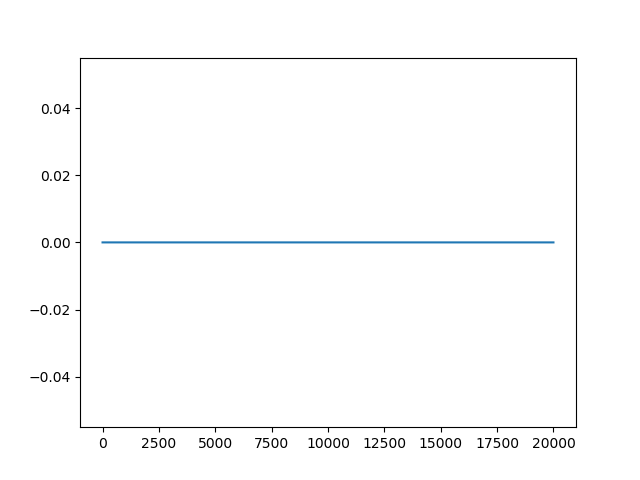

<IPython.core.display.Javascript object>


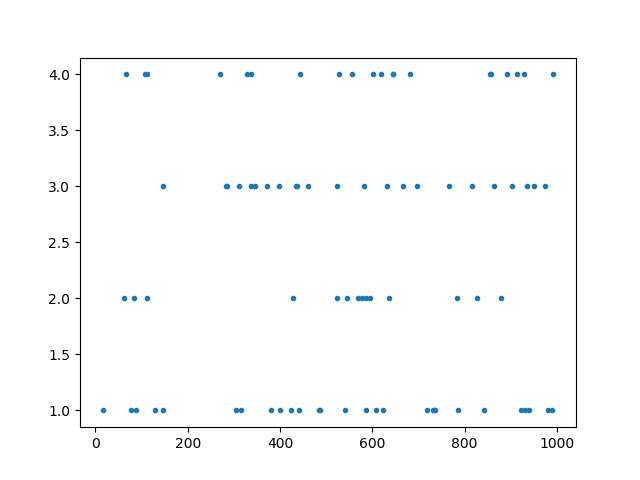

<IPython.core.display.Javascript object>


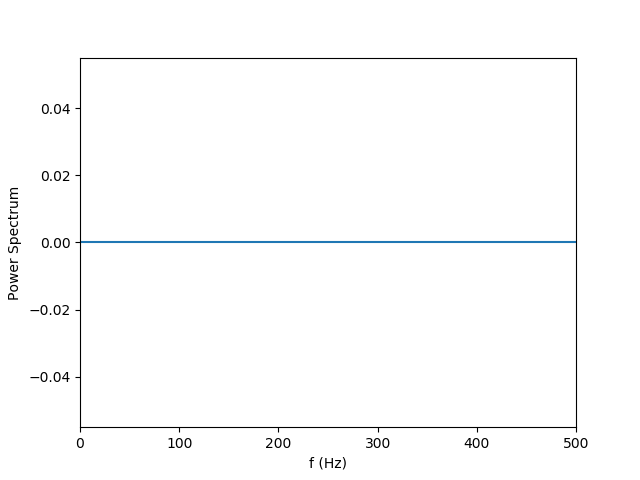

<IPython.core.display.Javascript object>


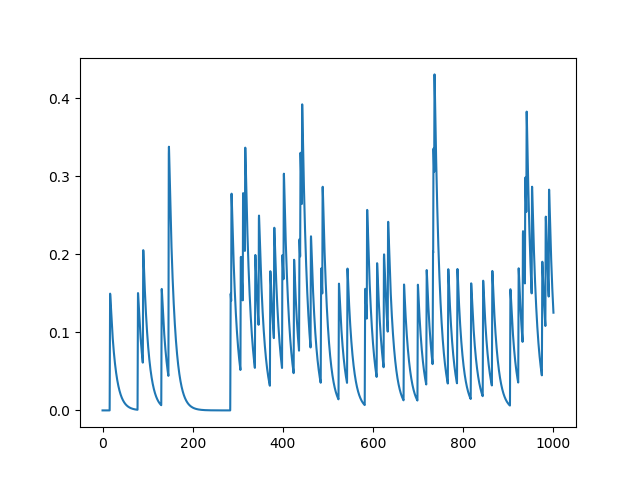

31.8035261631 seconds


In [4]:
tic = time.time()
instFR = simulator(nCM, nS, nFR, nFF, nRC, params, declinefactor_MN, declinefactor_RC, MNposition, RCposition, gmaxFF)
toc = time.time()
print str(toc - tic) + ' seconds'